In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import emoji
import re


In [2]:
df = pd.read_csv('cutWord.csv', sep='\t', names=['word'], header=None)
df

,word
0,Column1.desc
1,คาเฟ่สวย มาชมนกแก้ว ให้อาหารปลาคราฟ ทานอาหารร...
2,⛅️ วันหยุดเสาร์อาทิตย์ใครยังไม่มีแพลนจะไปเที่ย...
3,หนีความวุ่นวายมาพักกายที่ภาคเหนือ ❄️🍃 @ชื่อบิว...
4,#ฤดูฝน #อากาศกรุงเทพ #ฝุ่นกรุงเทพ #เที่ยวกรุงเ...
...,...
129,คลิปดองงจนเน่าแล้ว#ขุนตาล #นั่งรถไฟ #เชียงใหม่...
130,พกสิ่งนี้ไปสู้กับฝุ่นที่อินเดีย @กาญเดินทาง✈️ ...
131,#จอดจนฝุ่นจับ #สมุทรปราการ #TikTokกินเที่ยว #พ...
132,#มูลนิธิสถาบันราชพฤกษ์ #เติมเต็มวิสาหกิจเพื่อส...


In [3]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ยิ่งกว่า',
 'ที่ๆ',
 'กันไหม',
 'เหลือ',
 'คราไหน',
 'ไม่ค่อยเป็น',
 'ทั่ว',
 'เพิ่งจะ',
 'ที',
 'เสร็จ',
 'หมดสิ้น',
 'อื่นๆ',
 'รือ',
 'บัดดล',
 'ยังงั้น',
 'ซึ่งได้แก่',
 'ภายหลัง',
 'แม้ว่า',
 'เป็นแต่',
 'แล้วเสร็จ',
 'ภายภาค',
 'เต็มไปหมด',
 'พวกนี้',
 'สบาย',
 'เยอะ',
 'ง่ายๆ',
 'ซึ่งๆ',
 'คล้าย',
 'บางครั้ง',
 'ทุกที่',
 'หากแม้น',
 'สูงส่ง',
 'อาจเป็นด้วย',
 'พอดี',
 'ตามแต่',
 'คราวที่',
 'ตนเอง',
 'เกิน',
 'ควร',
 'ใดๆ',
 'ตลอดปี',
 'สุดๆ',
 'แต่ไหน',
 'ที่แท้',
 'ช่วงที่',
 'จำพวก',
 'ถูก',
 'เกี่ยวกัน',
 'เพื่อที่จะ',
 'บ้าง',
 'เขียน',
 'จริงๆ',
 'อนึ่ง',
 'นานๆ',
 'จนเมื่อ',
 'แต่ต้อง',
 'คราวหนึ่ง',
 'ทุกวันนี้',
 'ด้วยเหตุว่า',
 'ช้านาน',
 'เสียนั่น',
 'ครานี้',
 'ช่วง',
 'คราวหน้า',
 'ดั่งกับว่า',
 'นอกจาก',
 'กันเถอะ',
 'เพียงแค่',
 'เผื่อ',
 'จัดตั้ง',
 'บ่อย',
 'นัก',
 'พวกที่',
 'คง',
 'จนถึง',
 'ทั้งนี้',
 'บางที่',
 'อันที่จริง',
 'มันๆ',
 'แต่ละ',
 'พวกโน้น',
 'อาจ',
 'ก่อนๆ',
 'ถึง',
 'ยิ่งขึ้นไป',
 'จนตลอด',
 'วันนั้น',
 'ใคร่จะ',
 'เพียงใด',
 'นับแต่นั้น',

In [4]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","#","@")) #ตัวที่จะตัดทิ้ง
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['word'].apply(text_process)
df

,word,text_tokens
0,Column1.desc,Column 1 desc
1,คาเฟ่สวย มาชมนกแก้ว ให้อาหารปลาคราฟ ทานอาหารร...,คาเฟ่ สวย มา ชม นกแก้ว ให้อาหาร ปลา ครา ฟ ทานอ...
2,⛅️ วันหยุดเสาร์อาทิตย์ใครยังไม่มีแพลนจะไปเที่ย...,⛅️ วันหยุด เสาร์ อาทิตย์ ใคร ยัง ไม่ มี แพลน จ...
3,หนีความวุ่นวายมาพักกายที่ภาคเหนือ ❄️🍃 @ชื่อบิว...,หนี ความวุ่นวาย มา พัก กาย ที่ ภาคเหนือ ❄️🍃 ชื...
4,#ฤดูฝน #อากาศกรุงเทพ #ฝุ่นกรุงเทพ #เที่ยวกรุงเ...,ฤดูฝน อากาศ กรุงเทพ ฝุ่น กรุงเทพ เที่ยว กรุงเท...
...,...,...
129,คลิปดองงจนเน่าแล้ว#ขุนตาล #นั่งรถไฟ #เชียงใหม่...,คลิป ดอง งจน เน่า แล้ว ขุน ตาล นั่ง รถไฟ เชียง...
130,พกสิ่งนี้ไปสู้กับฝุ่นที่อินเดีย @กาญเดินทาง✈️ ...,พก สิ่ง นี้ ไป สู้ กับ ฝุ่น ที่ อินเดีย กา ญ เ...
131,#จอดจนฝุ่นจับ #สมุทรปราการ #TikTokกินเที่ยว #พ...,จอด จน ฝุ่นจับ สมุทรปราการ TikTok กิน เที่ยว พ...
132,#มูลนิธิสถาบันราชพฤกษ์ #เติมเต็มวิสาหกิจเพื่อส...,มูลนิธิ สถาบัน ราชพฤกษ์ เติมเต็ม วิสาหกิจ เพื่...


In [5]:
def remove_emojis(text):
    # Initialize an empty string to store non-emoji characters
    result = ""
    
    # Iterate over each character in the text
    for char in text:
        # Check if the character is an emoji
        if not emoji.is_emoji(char):
            # If not an emoji, add it to the result string
            result += char
    
    return result

In [6]:
# Replace 'your_column_name' with the actual column name containing text
df['text_tokens_remove_emojis'] = df['text_tokens'].apply(remove_emojis)

# Display the first few rows to see the cleaned text
df.head()


,word,text_tokens,text_tokens_remove_emojis
0,Column1.desc,Column 1 desc,Column 1 desc
1,คาเฟ่สวย มาชมนกแก้ว ให้อาหารปลาคราฟ ทานอาหารร...,คาเฟ่ สวย มา ชม นกแก้ว ให้อาหาร ปลา ครา ฟ ทานอ...,คาเฟ่ สวย มา ชม นกแก้ว ให้อาหาร ปลา ครา ฟ ทานอ...
2,⛅️ วันหยุดเสาร์อาทิตย์ใครยังไม่มีแพลนจะไปเที่ย...,⛅️ วันหยุด เสาร์ อาทิตย์ ใคร ยัง ไม่ มี แพลน จ...,️ วันหยุด เสาร์ อาทิตย์ ใคร ยัง ไม่ มี แพลน จะ...
3,หนีความวุ่นวายมาพักกายที่ภาคเหนือ ❄️🍃 @ชื่อบิว...,หนี ความวุ่นวาย มา พัก กาย ที่ ภาคเหนือ ❄️🍃 ชื...,หนี ความวุ่นวาย มา พัก กาย ที่ ภาคเหนือ ️ ชื่อ...
4,#ฤดูฝน #อากาศกรุงเทพ #ฝุ่นกรุงเทพ #เที่ยวกรุงเ...,ฤดูฝน อากาศ กรุงเทพ ฝุ่น กรุงเทพ เที่ยว กรุงเท...,ฤดูฝน อากาศ กรุงเทพ ฝุ่น กรุงเทพ เที่ยว กรุงเท...


In [7]:
df['word']

0                                           Column1.desc
1      คาเฟ่สวย มาชมนกแก้ว ให้อาหารปลาคราฟ  ทานอาหารร...
2      ⛅️ วันหยุดเสาร์อาทิตย์ใครยังไม่มีแพลนจะไปเที่ย...
3      หนีความวุ่นวายมาพักกายที่ภาคเหนือ ❄️🍃 @ชื่อบิว...
4      #ฤดูฝน #อากาศกรุงเทพ #ฝุ่นกรุงเทพ #เที่ยวกรุงเ...
                             ...                        
129    คลิปดองงจนเน่าแล้ว#ขุนตาล #นั่งรถไฟ #เชียงใหม่...
130    พกสิ่งนี้ไปสู้กับฝุ่นที่อินเดีย @กาญเดินทาง✈️ ...
131    #จอดจนฝุ่นจับ #สมุทรปราการ #TikTokกินเที่ยว #พ...
132    #มูลนิธิสถาบันราชพฤกษ์ #เติมเต็มวิสาหกิจเพื่อส...
133    หนีฝุ่นควัน #เชียงใหม่ #fyp #สตอรี่ความรู้สึก ...
Name: word, Length: 134, dtype: object

In [8]:
df['text_tokens']

0                                          Column 1 desc
1      คาเฟ่ สวย มา ชม นกแก้ว ให้อาหาร ปลา ครา ฟ ทานอ...
2      ⛅️ วันหยุด เสาร์ อาทิตย์ ใคร ยัง ไม่ มี แพลน จ...
3      หนี ความวุ่นวาย มา พัก กาย ที่ ภาคเหนือ ❄️🍃 ชื...
4      ฤดูฝน อากาศ กรุงเทพ ฝุ่น กรุงเทพ เที่ยว กรุงเท...
                             ...                        
129    คลิป ดอง งจน เน่า แล้ว ขุน ตาล นั่ง รถไฟ เชียง...
130    พก สิ่ง นี้ ไป สู้ กับ ฝุ่น ที่ อินเดีย กา ญ เ...
131    จอด จน ฝุ่นจับ สมุทรปราการ TikTok กิน เที่ยว พ...
132    มูลนิธิ สถาบัน ราชพฤกษ์ เติมเต็ม วิสาหกิจ เพื่...
133    หนี ฝุ่น ควัน เชียงใหม่ fyp สตอ รี่ ความรู้สึก...
Name: text_tokens, Length: 134, dtype: object

In [12]:
df['text_tokens_remove_emojis']

0                                          Column 1 desc
1      คาเฟ่ สวย มา ชม นกแก้ว ให้อาหาร ปลา ครา ฟ ทานอ...
2      ️ วันหยุด เสาร์ อาทิตย์ ใคร ยัง ไม่ มี แพลน จะ...
3      หนี ความวุ่นวาย มา พัก กาย ที่ ภาคเหนือ ️ ชื่อ...
4      ฤดูฝน อากาศ กรุงเทพ ฝุ่น กรุงเทพ เที่ยว กรุงเท...
                             ...                        
129    คลิป ดอง งจน เน่า แล้ว ขุน ตาล นั่ง รถไฟ เชียง...
130    พก สิ่ง นี้ ไป สู้ กับ ฝุ่น ที่ อินเดีย กา ญ เ...
131    จอด จน ฝุ่นจับ สมุทรปราการ TikTok กิน เที่ยว พ...
132    มูลนิธิ สถาบัน ราชพฤกษ์ เติมเต็ม วิสาหกิจ เพื่...
133    หนี ฝุ่น ควัน เชียงใหม่ fyp สตอ รี่ ความรู้สึก...
Name: text_tokens_remove_emojis, Length: 134, dtype: object

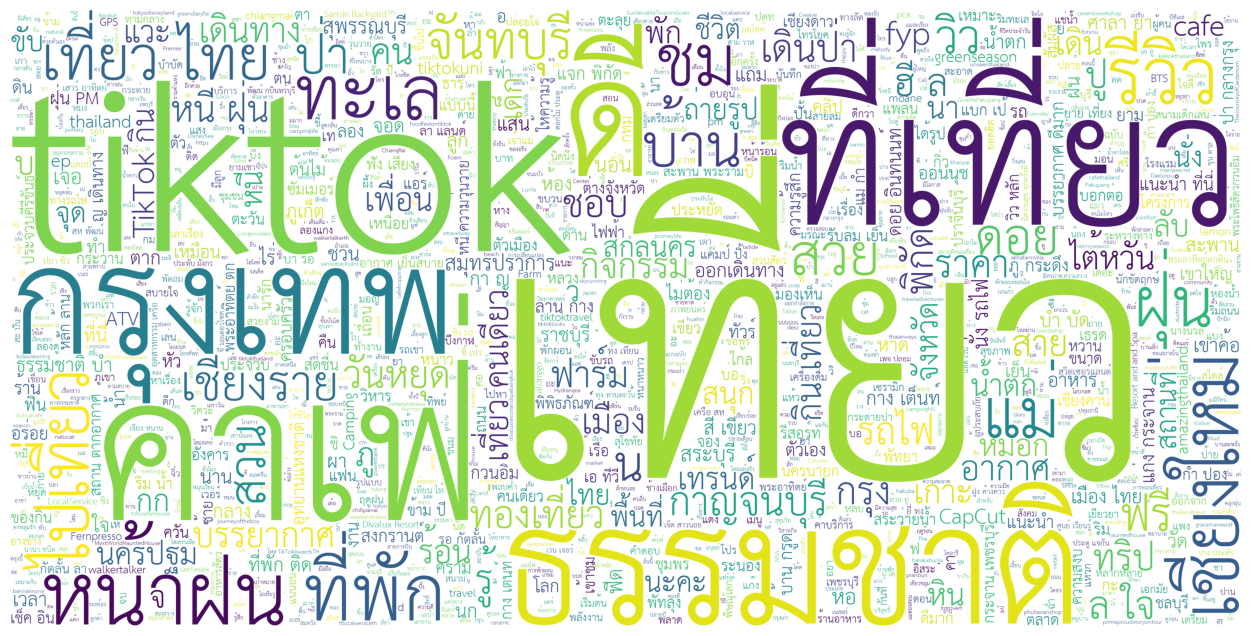

In [14]:
from wordcloud import WordCloud, STOPWORDS
df_word = df
word_all = " ".join(text for text in df_word ['text_tokens_remove_emojis'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(df['text_tokens_remove_emojis'])
cvec.vocabulary_

{'Column': 94,
 '1': 23,
 'desc': 180,
 'คาเฟ่': 408,
 'สวย': 1126,
 'มา': 915,
 'ชม': 475,
 'นกแก้ว': 690,
 'ให้อาหาร': 1611,
 'ปลา': 782,
 'ครา': 384,
 'ฟ': 872,
 'ทานอาหาร': 643,
 'ริม': 1003,
 'บึง': 754,
 'วิว': 1085,
 'สุด': 1168,
 'ที่': 654,
 'นก': 689,
 'TikTok': 142,
 'กิน': 331,
 'เที่ยว': 1390,
 'tiktok': 251,
 'พา': 859,
 'ทั้งปี': 635,
 '365': 60,
 'd': 179,
 'นครนายก': 691,
 'ที่เที่ยว': 663,
 '️': 1665,
 'วันหยุด': 1075,
 'เสาร์': 1479,
 'อาทิตย์': 1269,
 'ใคร': 1596,
 'ยัง': 951,
 'ไม่': 1638,
 'มี': 924,
 'แพลน': 1537,
 'จะ': 448,
 'ไปเที่ยว': 1633,
 'ไหน': 1646,
 'แนะนำ': 1526,
 'ที่นี่': 659,
 'เลย': 1455,
 'ยยย': 946,
 'ใกล้': 1593,
 'กทม': 279,
 'ปทุมธานี': 767,
 'นี่เอง': 713,
 'ค่า': 427,
 '': 0,
 'แกะ': 1501,
 'กะ': 311,
 'บัว': 745,
 'Farm': 106,
 'Cafe': 88,
 'and': 155,
 'restaurant': 238,
 'เวลาเปิด': 1469,
 '-': 14,
 'ปิด': 800,
 '1000': 26,
 'น': 688,
 '2000': 45,
 'หยุด': 1204,
 'วัน': 1072,
 'อังคาร': 1260,
 'ยกเว้น': 945,
 '**': 11,
 'เปิด': 1405,
 'นั